### Copyright 2021 Jens Liebehenschel, Frankfurt University of Applied Sciences, FB2, Computer Science
### No liability or warranty; only for educational and non-commercial purposes
### See some basic hints for working with Jupyter notebooks in README.md
## Linear and binary search with visualization

In [1]:
# returns the index of key in a or False if not found
def linear_search(a, key):
    global steps
    steps = []
    
    # the key to be searched is stored in an additional element at the end of the array (a[ARRAY_SIZE])
    # rationale: improve understandability of key comparisons in output
    a.append(key)

    # nothing yet checked
    steps.append([[NOT_CHECKED]*ARRAY_SIZE, [], a[:]])

    for i in range(ARRAY_SIZE):
        if output_compared_keys:
            steps.append([[], [i,ARRAY_SIZE], a[:]])
        if a[ARRAY_SIZE] == a[i]:
            steps.append([[NOT_FOUND]*(i)+[FOUND]+[NOT_CHECKED]*(ARRAY_SIZE-(i+1)), [], a[:]])
            # remove key again
            a.pop()
            return i
        steps.append([[NOT_FOUND]*(i+1)+[NOT_CHECKED]*(ARRAY_SIZE-(i+1)), [], a[:]])
    # remove key again
    a.pop()
    return False

In [2]:
# returns the index of key in a or False if not found
def binary_search(a, key):
    global steps, index_last_complete_step
    steps = []
    index_last_complete_step = 0

    # the key to be searched is stored in an additional element at the end of the array (a[ARRAY_SIZE])
    # rationale: improve understandability of key comparisons in output
    a.append(key)

    # nothing yet checked
    steps.append([[NOT_CHECKED]*ARRAY_SIZE, [], a[:]])

    left = 0
    right = ARRAY_SIZE-1
    while (left <= right):
        mid = (left + right) // 2
        # we count the two comparisons of the same keys as one
        if output_compared_keys:
            steps.append([[], [mid,ARRAY_SIZE], a[:]])
        if a[ARRAY_SIZE] == a[mid]:
            new_state = steps[index_last_complete_step][0][:mid] +\
                    [FOUND] + steps[index_last_complete_step][0][mid+1:]
            step = [new_state, [], a[:]]
            index_last_complete_step = len(steps)
            steps.append(step)
            # remove key again
            a.pop() 
            return mid
        elif a[ARRAY_SIZE] < a[mid]:
            new_state = steps[index_last_complete_step][0][:mid] + [NOT_FOUND]*(ARRAY_SIZE-mid)
            step = [new_state, [], a[:]]
            index_last_complete_step = len(steps)
            steps.append(step)
            right = mid - 1
        else:
            new_state = [NOT_FOUND]*(mid+1) + steps[index_last_complete_step][0][mid+1:]
            step = [new_state, [], a[:]]
            index_last_complete_step = len(steps)
            steps.append(step)
            left = mid + 1
    # remove key again
    a.pop()
    return False

## Helper functions

In [3]:
def plot_values(x, y_vals, a):
    for y in y_vals:
        plt.text(x, y, a[y], verticalalignment='center_baseline', horizontalalignment='center', fontsize=14)

def plot_states(x, states, a):
    # colors
    for y in range(ARRAY_SIZE):
        plt.plot([x,x],[y-OFFSET, y+OFFSET], COLORS[states[y]][0], linewidth=8, solid_capstyle="butt")
    # values
    plot_values(x, range(ARRAY_SIZE), a)

def plot_elements(x, y_vals, col, a):
    # colors
    minimum = min(y_vals)
    maximum = max(y_vals)
    # elements
    plot_interval(x, [minimum, minimum], col)
    plot_interval(x, [maximum, maximum], col)
    # line between both elements
    if maximum-minimum > 1:
        plot_interval(x, [minimum+1, maximum-1], col, thick_lines = False)
    # values
    plot_values(x, [minimum,maximum], a)

def plot_interval(x, y_vals, col, thick_lines = True):
    if thick_lines:
        plt.plot([x,x],[y_vals[0]-OFFSET, y_vals[1]+OFFSET], col, linewidth=8, solid_capstyle="butt")
    else:
        plt.plot([x,x],[y_vals[0]-OFFSET, y_vals[1]+OFFSET], col)

## Output graphical view

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 12]

def output_graphical_view(ARRAY_SIZE):
    global steps

    # format graph
    plt.xticks(range(0, len(steps)+1, max(1,len(steps)//10)), fontsize=14)
    plt.yticks(range(0, ARRAY_SIZE+1, max(1,ARRAY_SIZE//10)), fontsize=14)
    plt.axis([-1, len(steps),-1, ARRAY_SIZE+1])
    #plt.axis('off')
    plt.xlabel("Searching steps")
    plt.ylabel("Indexes of array to be searched")

    # output graph based on collected data
    for i, step in enumerate(steps):
        if len(step[0]) > 0:
            plot_states(i, step[0], step[2])
        elif output_compared_keys and len(step[1]) > 0:
            plot_elements(i, step[1], COL_COMPARISON, step[2])

    # draw horitontal lines
    for i in range(ARRAY_SIZE+1):
        plt.hlines(xmin=-1, xmax=len(steps), y=i-OFFSET, color=COL_HORIZ_LINES)
    plt.hlines(xmin=-1, xmax=len(steps), y=ARRAY_SIZE-OFFSET, color=COL_LAST_HORIZ_LINE)
   
    # show plot
    plt.show()

## Constants

In [5]:
# change output colors here
COL_COMPARISON = 'skyblue'
COL_FOUND = 'mediumseagreen'
COL_NOT_FOUND = 'lightgray'
COL_NOT_CHECKED = 'tomato'
COL_HORIZ_LINES = 'lightgray'
COL_LAST_HORIZ_LINE = 'k'

# offset for matching array index and y-axis description in output
OFFSET = 0.5

# Some output text
TEXT_BEFORE_SORTING1 = "Searching"
TEXT_BEFORE_SORTING2 = "in array"
TEXT_AFTER_SORTING_FALSE = "Key not found"
TEXT_AFTER_SORTING_TRUE = "Key found at position"

## Global variable for easier information exchange between algorithms and output functions

In [6]:
# steps contains the data for visualization of the single steps
# steps: [[states], [compared keys], [array]]
# [states] state for each position is one of [found, not found, not checked]
# [compared keys]: two indexes in a list
# [array]: copy of array in current state
steps = []
# used as base for the next step showing the states
index_last_complete_step = 0
# states for each position in array, indexes must fit to ordering in COLORS
FOUND = 2
NOT_FOUND = 1
NOT_CHECKED = 0

## Configuration data for keys in output 

In [7]:
# change output settings here
output_compared_keys = False
output_compared_keys = True

## Legend for output

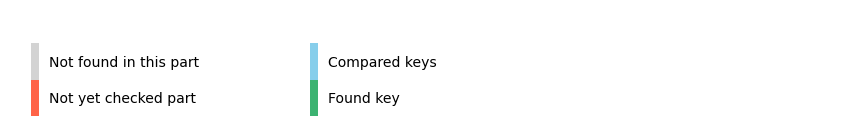

In [8]:
COLORS = [[COL_NOT_CHECKED,"Not yet checked part"], [COL_NOT_FOUND,"Not found in this part"],
          [COL_FOUND,"Found key"], [COL_COMPARISON,"Compared keys"]]
plt.figure(figsize=(15, 2))
plt.axis([0, 30, 0, 3])
plt.axis('off')
for i in range(2):
    plot_interval(1, [i+OFFSET,i+OFFSET], COLORS[i][0])
    plt.text(1+OFFSET, i+OFFSET, COLORS[i][1], verticalalignment='center_baseline', horizontalalignment='left', fontsize=14)
for i in range(2):
    plot_interval(11, [i+OFFSET,i+OFFSET], COLORS[i+2][0])
    plt.text(11+OFFSET, i+OFFSET, COLORS[i+2][1], verticalalignment='center_baseline', horizontalalignment='left', fontsize=14)
plt.show()

## Constants

In [9]:
# The size of array in tests can be changed here
ARRAY_SIZE = 10

## Generate test data and test algorithms

In [10]:
# use numpy for generating random input
import numpy
# initialialize random number generator to obtain reproducable results
# other values might be used or even no initialization done here
numpy.random.seed(0)

In [11]:
# tests for search algorithms using sorted array
sorted_array = list(range(ARRAY_SIZE))
# set of keys to be searched in array (first, mid, last and and one non-existing key)
keys_to_be_searched = [0,ARRAY_SIZE//2,ARRAY_SIZE-1,ARRAY_SIZE]

Searching 0 in array [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Key found at position 0


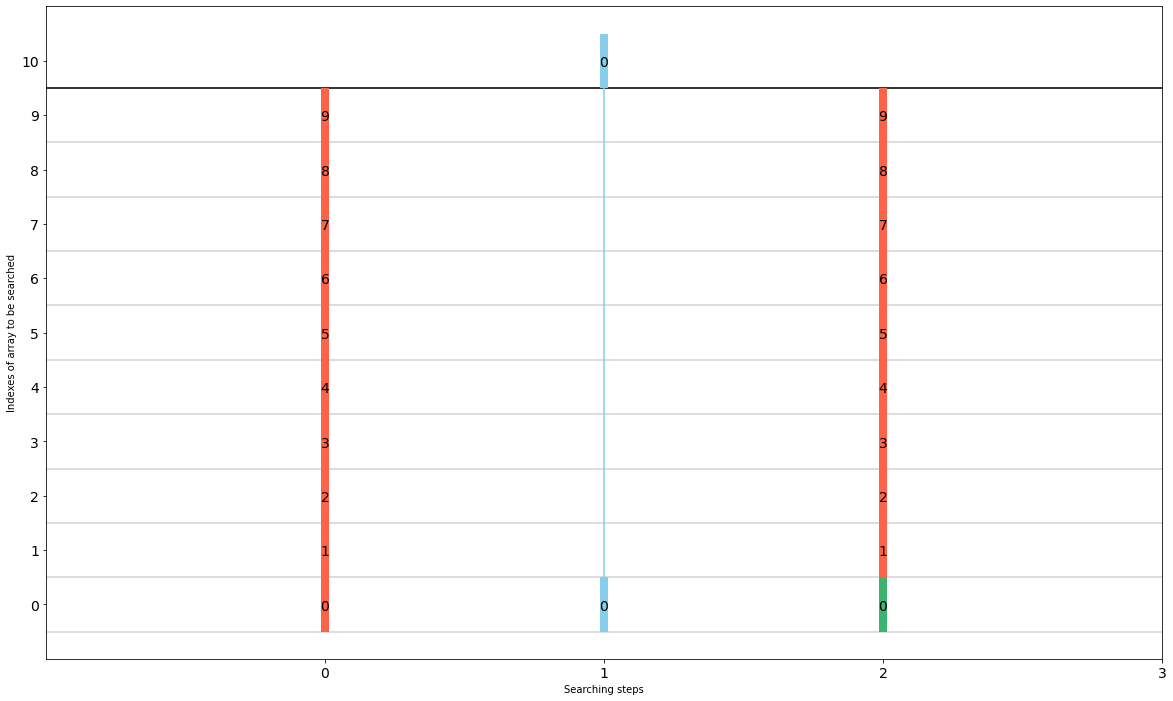

Searching 5 in array [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Key found at position 5


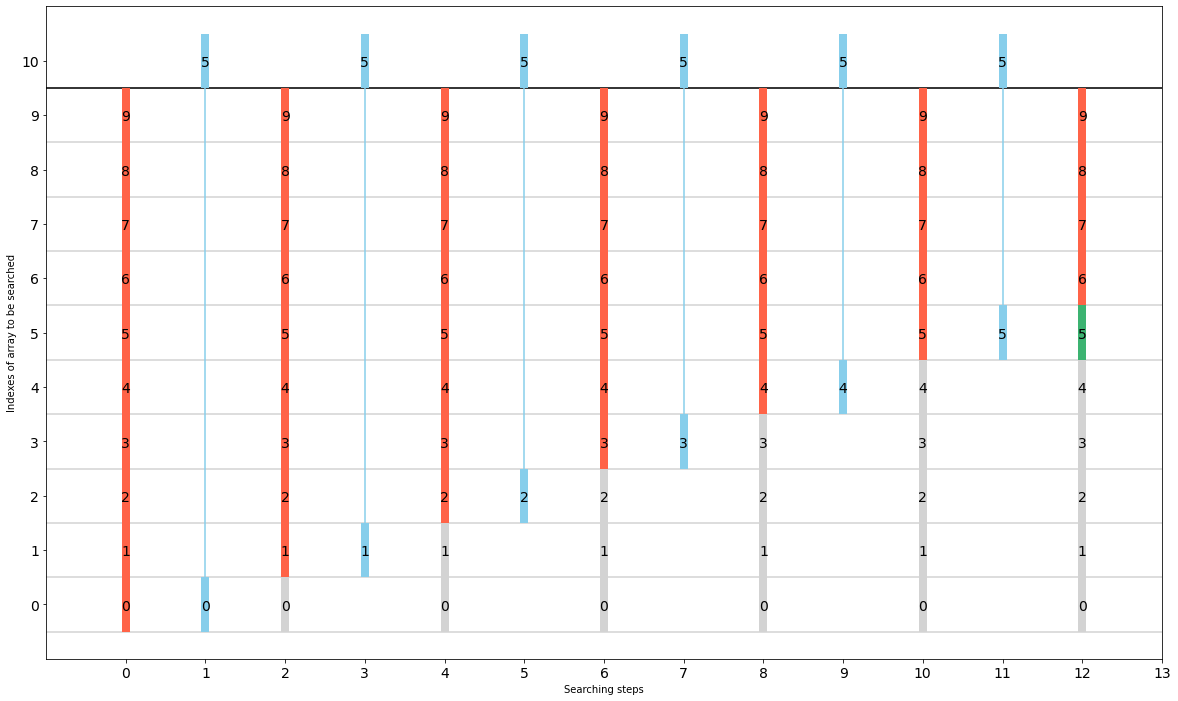

Searching 9 in array [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Key found at position 9


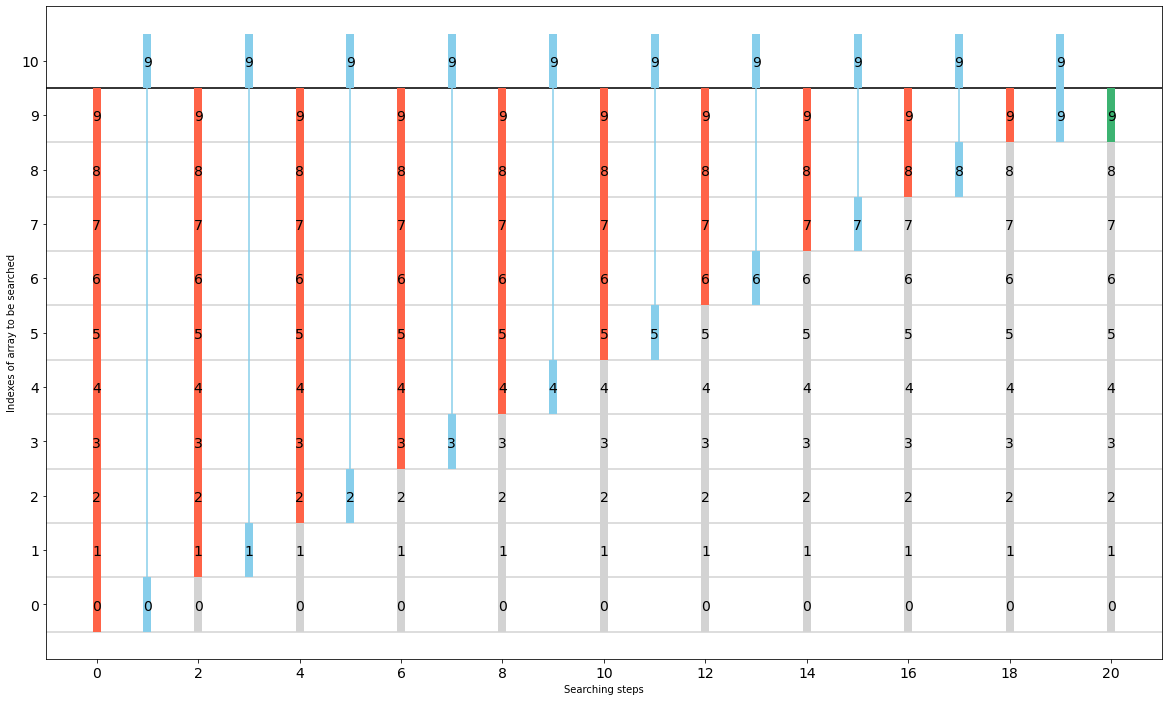

Searching 10 in array [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Key not found


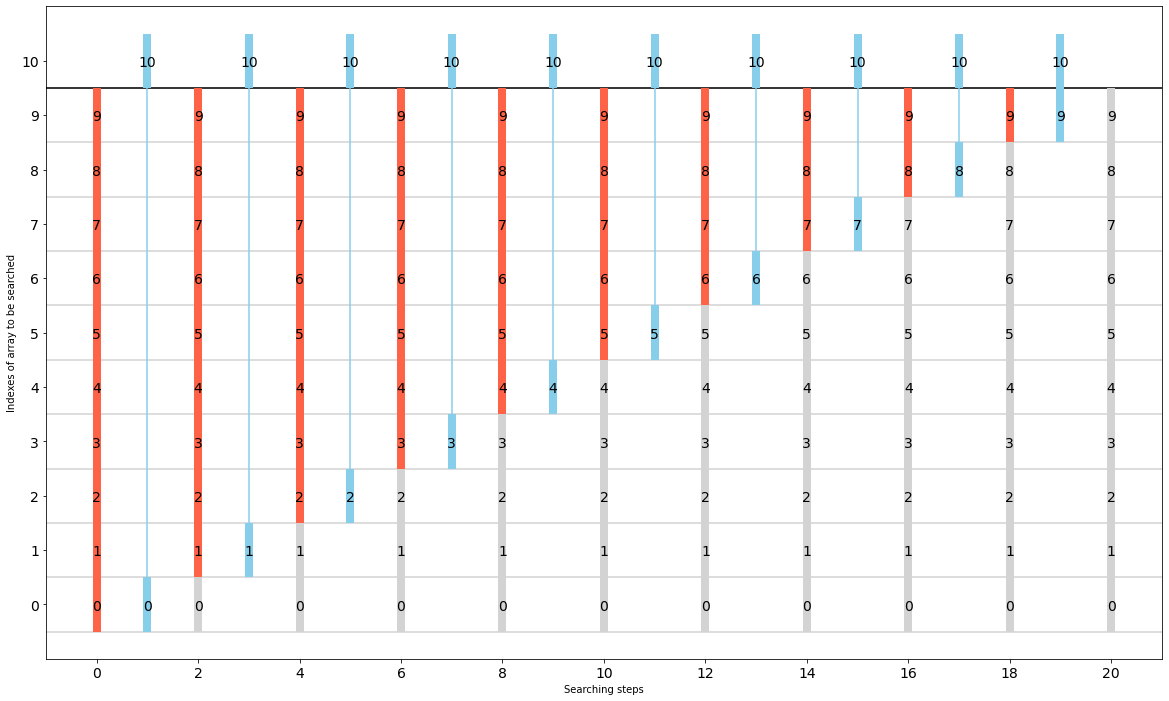

In [12]:
# linear search 
for key in keys_to_be_searched:
    print(TEXT_BEFORE_SORTING1, key, TEXT_BEFORE_SORTING2, sorted_array)
    res = linear_search(sorted_array, key)
    if isinstance(res,bool) and res == False:
        print(TEXT_AFTER_SORTING_FALSE)
    else:
        print(TEXT_AFTER_SORTING_TRUE, res)
    output_graphical_view(ARRAY_SIZE)

Searching 0 in array [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Key found at position 0


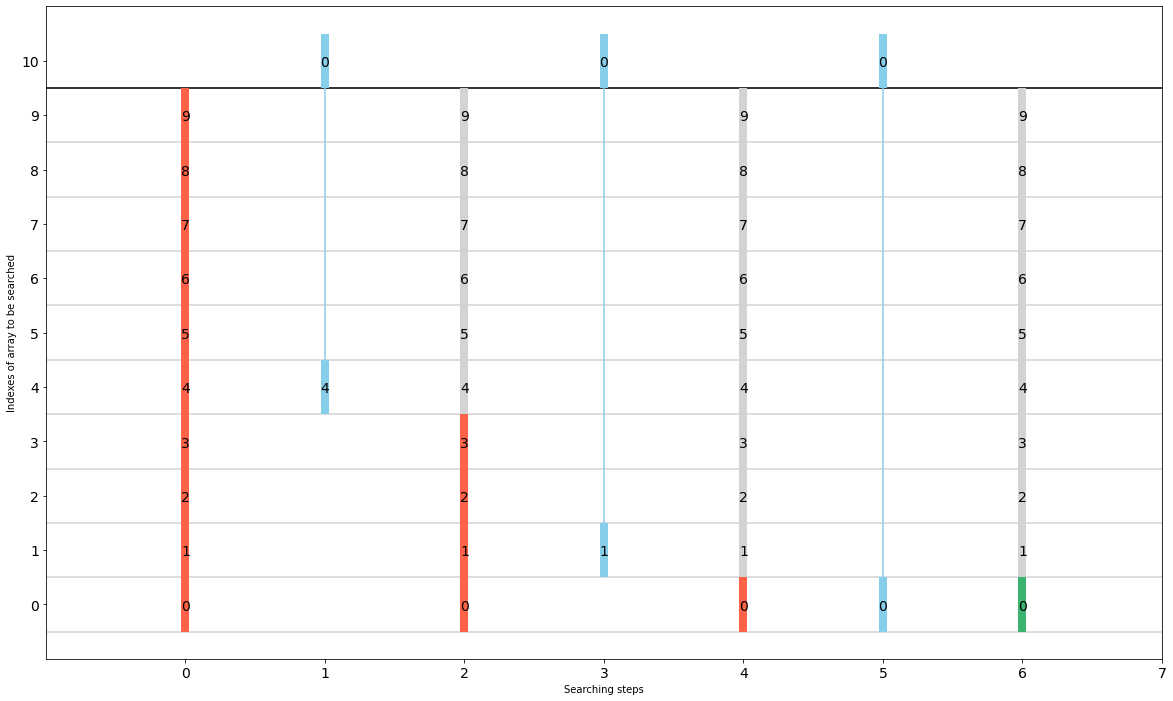

Searching 5 in array [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Key found at position 5


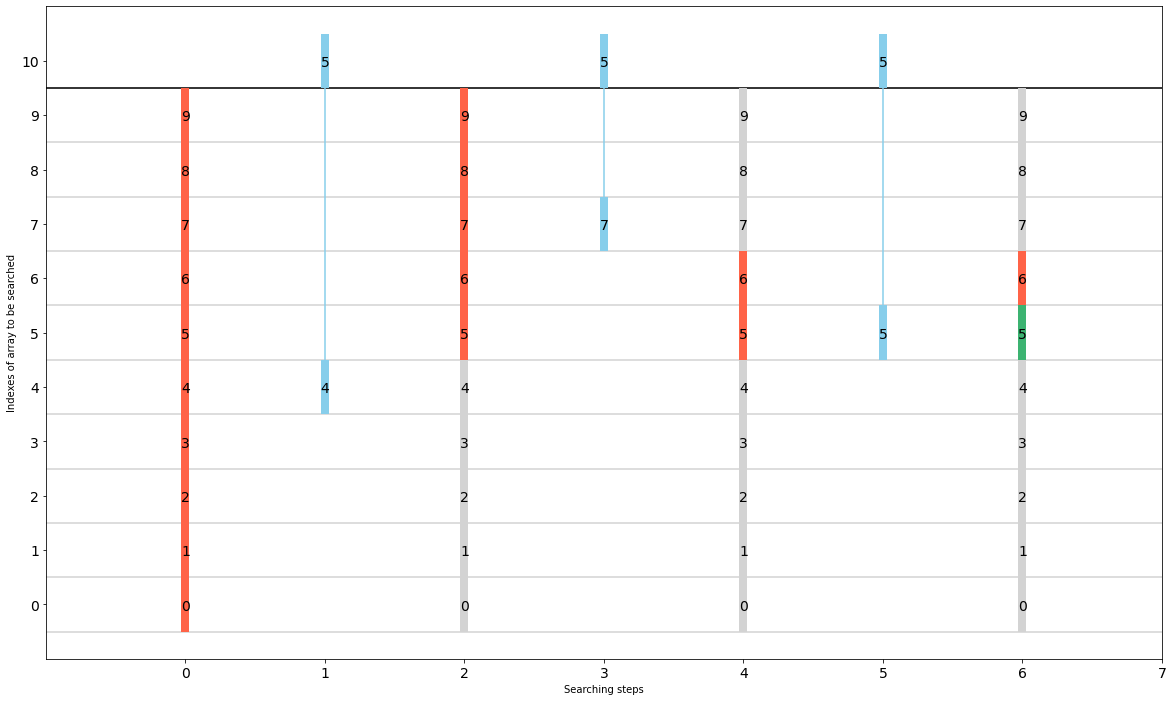

Searching 9 in array [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Key found at position 9


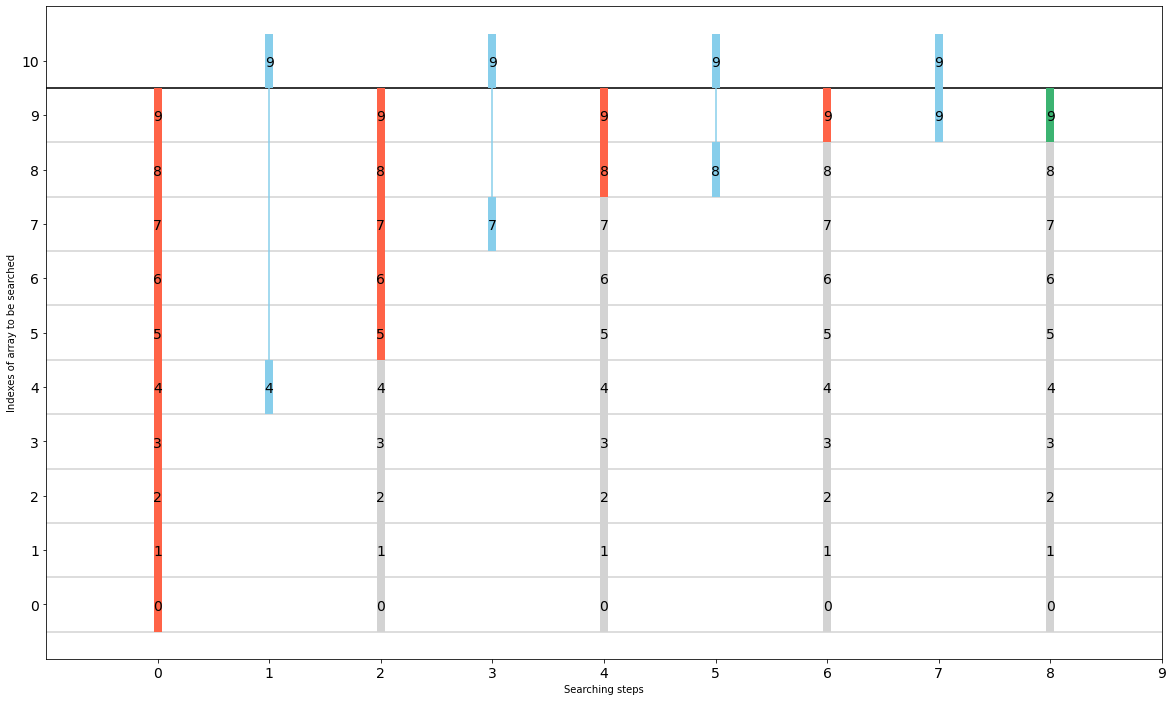

Searching 10 in array [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Key not found


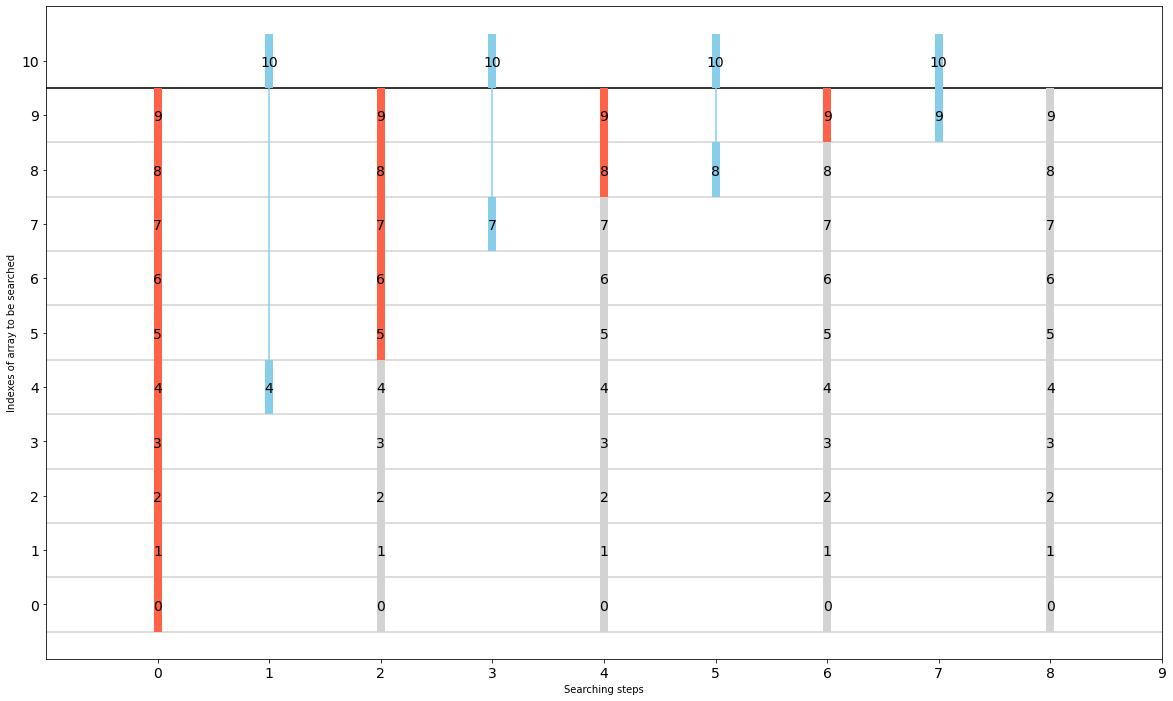

In [13]:
# binary search
for key in keys_to_be_searched:
    print(TEXT_BEFORE_SORTING1, key, TEXT_BEFORE_SORTING2, sorted_array)
    res = binary_search(sorted_array, key)
    if isinstance(res,bool) and res == False:
        print(TEXT_AFTER_SORTING_FALSE)
    else:
        print(TEXT_AFTER_SORTING_TRUE, res)
    output_graphical_view(ARRAY_SIZE)

Searching 16 in array [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Key found at position 16


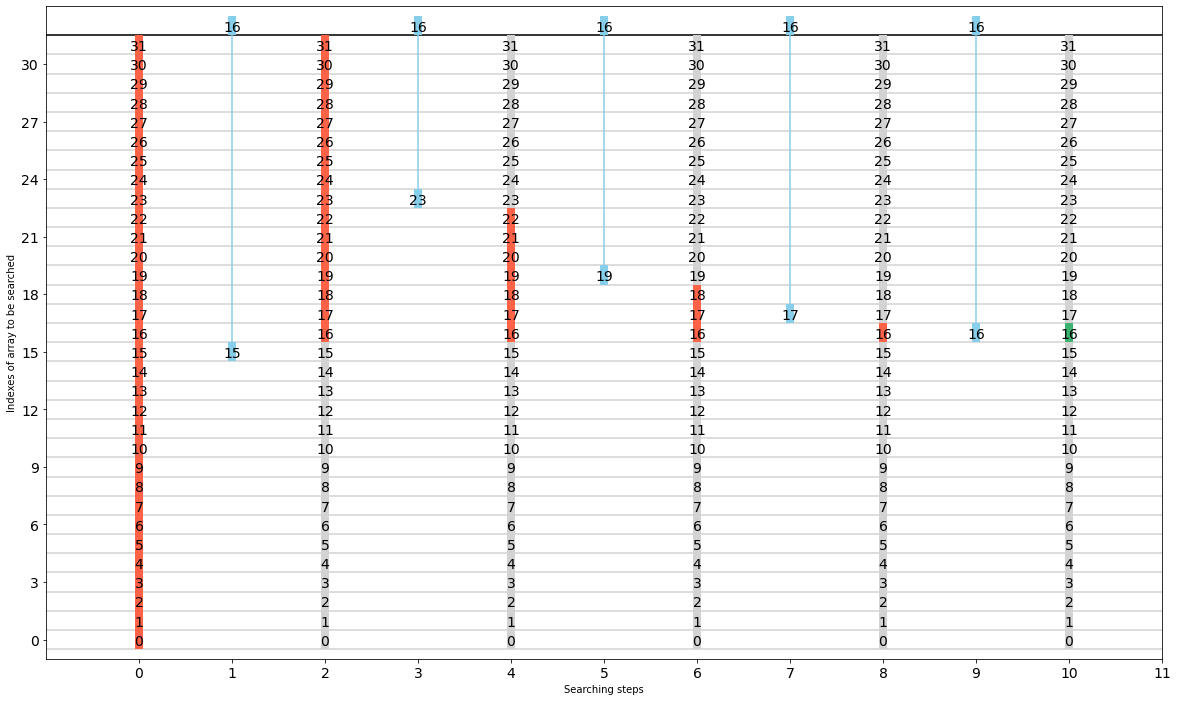

Searching 17 in array [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Key found at position 17


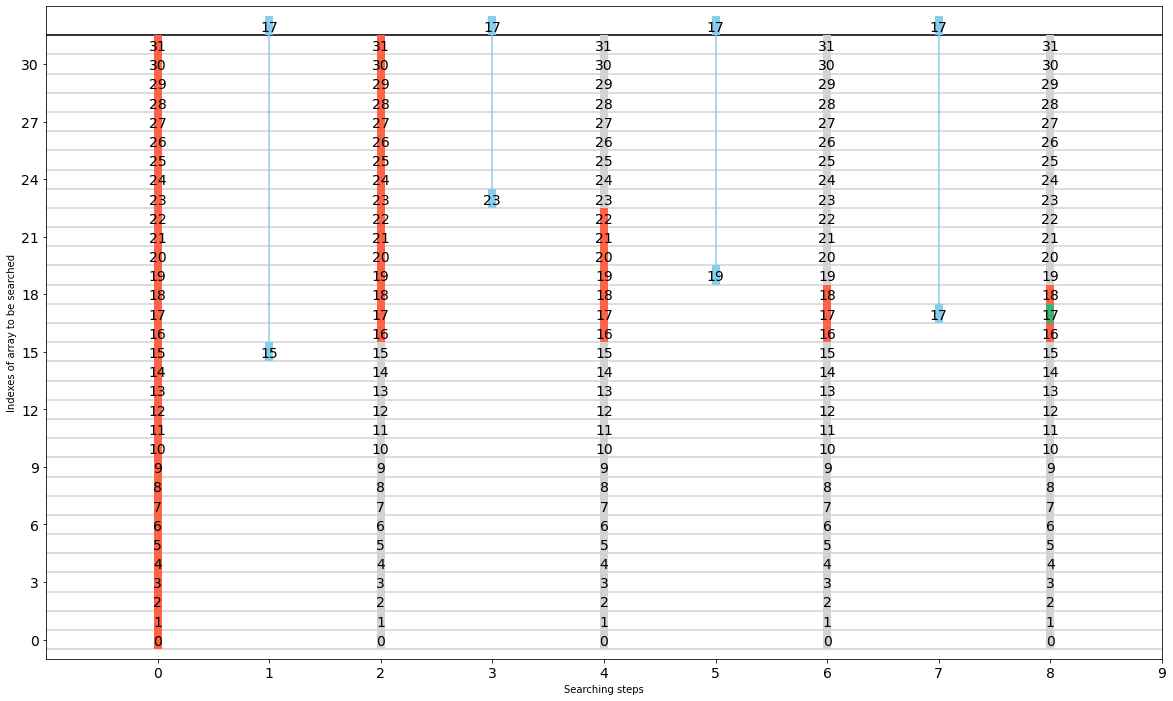

In [14]:
# binary search with larger arrays
ARRAY_SIZE = 32
sorted_array = list(range(ARRAY_SIZE))
keys_to_be_searched = [ARRAY_SIZE//2, ARRAY_SIZE//2+1]
for key in keys_to_be_searched:
    print(TEXT_BEFORE_SORTING1, key, TEXT_BEFORE_SORTING2, sorted_array)
    res = binary_search(sorted_array, key)
    if isinstance(res,bool) and res == False:
        print(TEXT_AFTER_SORTING_FALSE)
    else:
        print(TEXT_AFTER_SORTING_TRUE, res)
    output_graphical_view(ARRAY_SIZE)

### Your tests here ...

Key found at position 5


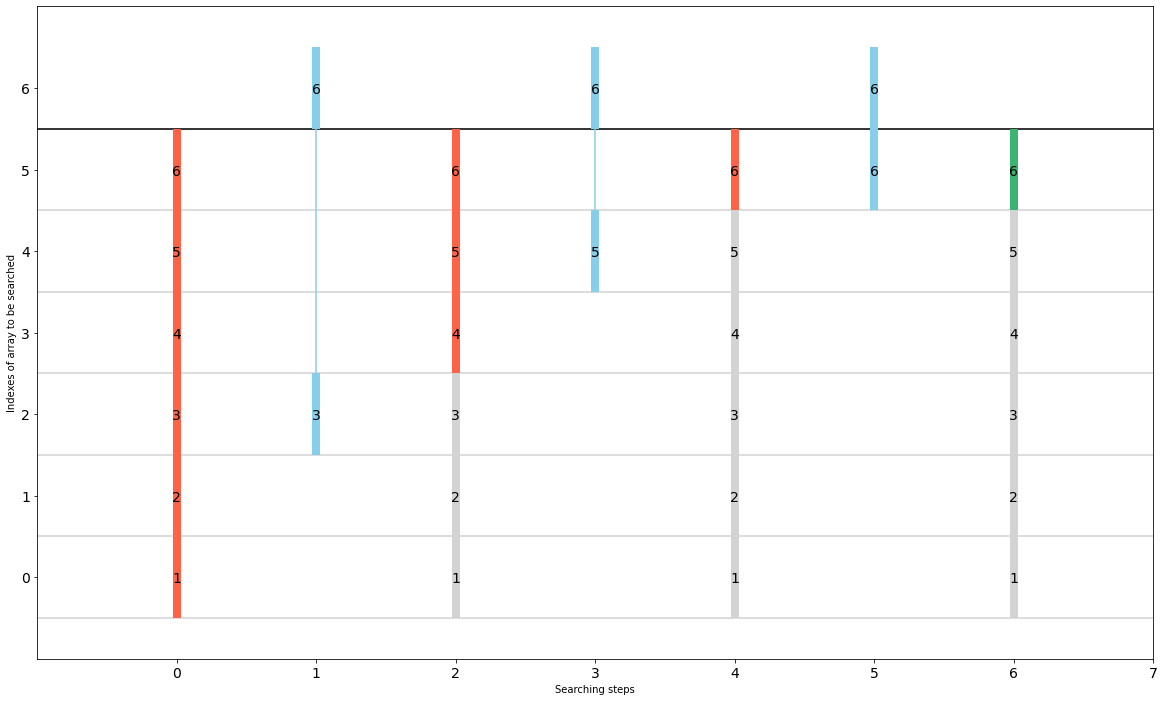

In [15]:
array = [1,2,3,4,5,6]
ARRAY_SIZE = len(array)
key = 6
res = binary_search(array, key)
if isinstance(res,bool) and res == False:
    print(TEXT_AFTER_SORTING_FALSE)
else:
    print(TEXT_AFTER_SORTING_TRUE, res)
output_graphical_view(ARRAY_SIZE)

In [16]:
# ... and here ...